## Pitch Names Classifier

In [1]:
import numpy as np

from htm.bindings.sdr import SDR
from htm.bindings.encoders import ScalarEncoder, ScalarEncoderParameters
from htm.algorithms import SpatialPooler as SP
from htm.algorithms import TemporalMemory as TM
from htm.bindings.algorithms import Classifier

import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [2]:
pitchNames = ("C","D","E","F","G","A","B")

scalarEncoderParams = ScalarEncoderParameters()
scalarEncoderParams.minimum = 0
scalarEncoderParams.maximum = 6
scalarEncoderParams.activeBits = 3
scalarEncoderParams.category = True

enc = ScalarEncoder(scalarEncoderParams)

print ("C: ", enc.encode(0))
print ("D: ", enc.encode(1))
print ("E: ", enc.encode(2))
print ("F: ", enc.encode(3))
print ("G: ", enc.encode(4))
print ("A: ", enc.encode(5))
print ("B: ", enc.encode(6))

C:  SDR( 21 ) 0, 1, 2
D:  SDR( 21 ) 3, 4, 5
E:  SDR( 21 ) 6, 7, 8
F:  SDR( 21 ) 9, 10, 11
G:  SDR( 21 ) 12, 13, 14
A:  SDR( 21 ) 15, 16, 17
B:  SDR( 21 ) 18, 19, 20


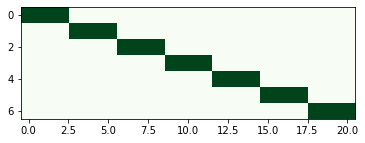

In [3]:
n_samples = int(enc.parameters.maximum - enc.parameters.minimum + 1)

sdrs = []
for i in np.linspace(enc.parameters.minimum, enc.parameters.maximum, n_samples):
    sdrs.append( enc.encode( i ).dense )

    clear_output(wait = True)
    plt.cla
    plt.imshow(np.array(sdrs), cmap = "Greens")
    plt.show()

In [4]:
inputSDR  = SDR( dimensions = (21, ) )
activeSDR = SDR( dimensions = (576,) )
sp = SP(inputDimensions  = inputSDR.dimensions,
        columnDimensions = activeSDR.dimensions,
        localAreaDensity = 0.02,
        globalInhibition = True,
        seed             = 1,
        synPermActiveInc   = 0.01,
        synPermInactiveDec = 0.008)

print(sp)

Spatial Pooler Connections:
    Inputs (21) ~> Outputs (576) via Segments (576)
    Segments on Cell Min/Mean/Max 1 / 1 / 1
    Potential Synapses on Segment Min/Mean/Max 11 / 11 / 11
    Connected Synapses on Segment Min/Mean/Max 1 / 5.44097 / 10
    Synapses Dead (0%) Saturated (0%)
    Synapses pruned (0%) Segments pruned (0%)



In [5]:
clsr = Classifier()

In [6]:
tm = TM(
    columnDimensions = (576,),
    cellsPerColumn=8,
    initialPermanence=0.5,
    connectedPermanence=0.5,
    minThreshold=8,
    maxNewSynapseCount=20,
    permanenceIncrement=0.1,
    permanenceDecrement=0.0,
    activationThreshold=8,
)
print(tm)

Temporal Memory Connections:
    Inputs (0) ~> Outputs (4608) via Segments (0)
    Segments on Cell Min/Mean/Max 0 / 0 / 0
    Potential Synapses on Segment Min/Mean/Max 4294967295 / nan / 0
    Connected Synapses on Segment Min/Mean/Max 65535 / nan / 0
    Synapses Dead (nan%) Saturated (nan%)
    Synapses pruned (nan%) Segments pruned (nan%)



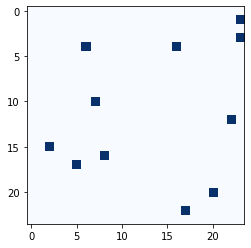

In [7]:
for i in range(len(pitchNames)):
    inputSDR = enc.encode(i)
    print("input SDR: ",inputSDR)
    sp.compute(inputSDR, True, activeSDR)
    print("Active SDR: ",activeSDR)
    clsr.learn( activeSDR.addNoise(0.2), i )
    print("Classifier learn: ",i)
    print("")

    clear_output(wait = True)
    plt.cla
    sampleSDR=activeSDR.dense.reshape(24,24)
    plt.imshow(sampleSDR, cmap = "Blues")
    plt.pause(0.01)

In [8]:
#seq = ["C","C","G","G","A","A","G","F","F","E","E","D","D","C"]
seq=[0,0,4,4,5,5,4,3,3,2,2,1,1,0]

#seq_clsr = Classifier()

input SDR:  SDR( 21 ) 0, 1, 2
Active SDR:  SDR( 576 ) 62, 113, 121, 222, 243, 320, 409, 453, 478, 567, 572

test0 SDR( 576, 8 )
test1 []
test2 []
test3 set()
test4 []


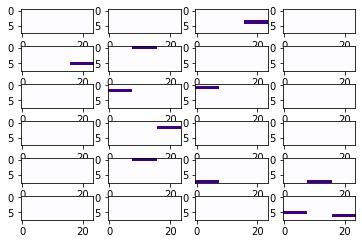

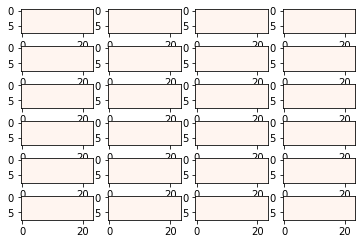

----------------------------------------------------------------------
Active sdr:  SDR( 576 ) 62, 113, 121, 222, 243, 320, 409, 453, 478, 567, 572


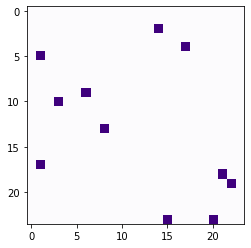

----------------------------------------------------------------------
Predicted sdr:  SDR( 576 )


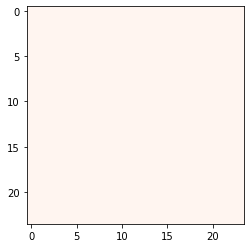

----------------------------------------------------------------------
PDF:  [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285]
----------------------------------------------------------------------
predict index:  nan
----------------------------------------------------------------------
predict label:  nan

input SDR:  SDR( 21 ) 0, 1, 2
Active SDR:  SDR( 576 ) 62, 113, 121, 222, 243, 320, 409, 453, 478, 567, 572

test0 SDR( 576, 8 ) 496, 904, 968, 1776, 1944, 2560, 3272, 3624, 3824, 4536, 4576
test1 [ 496  904  968 1776 1944 2560 3272 3624 3824 4536 4576]
test2 [62, 113, 121, 222, 243, 320, 409, 453, 478, 567, 572]
test3 {320, 453, 478, 409, 113, 243, 567, 62, 121, 572, 222}
test4 [ 62 113 121 222 243 320 409 453 478 567 572]


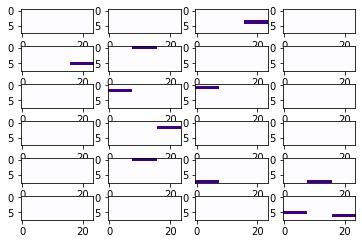

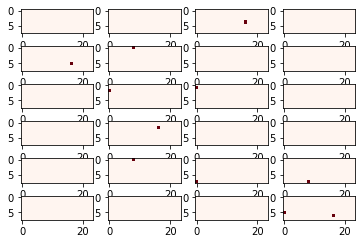

----------------------------------------------------------------------
Active sdr:  SDR( 576 ) 62, 113, 121, 222, 243, 320, 409, 453, 478, 567, 572


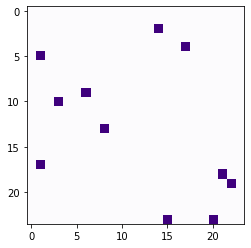

----------------------------------------------------------------------
Predicted sdr:  SDR( 576 ) 62, 113, 121, 222, 243, 320, 409, 453, 478, 567, 572


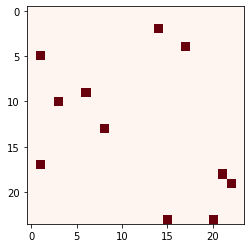

----------------------------------------------------------------------
PDF:  [0.14282858510295438, 0.14282855653723786, 0.1428285708236661, 0.1428285708236661, 0.1429714708393767, 0.14285713939439657, 0.14285713939439657]
----------------------------------------------------------------------
predict index:  4
----------------------------------------------------------------------
predict label:  G

input SDR:  SDR( 21 ) 12, 13, 14
Active SDR:  SDR( 576 ) 39, 60, 69, 211, 382, 509, 523, 540, 552, 556, 573

test0 SDR( 576, 8 )
test1 []
test2 []
test3 set()
test4 []


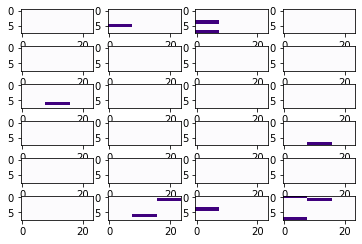

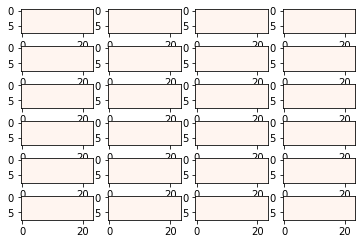

----------------------------------------------------------------------
Active sdr:  SDR( 576 ) 39, 60, 69, 211, 382, 509, 523, 540, 552, 556, 573


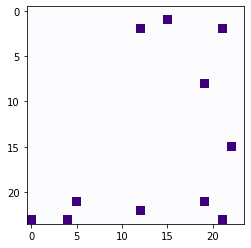

----------------------------------------------------------------------
Predicted sdr:  SDR( 576 )


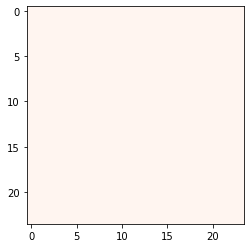

----------------------------------------------------------------------
PDF:  [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285]
----------------------------------------------------------------------
predict index:  nan
----------------------------------------------------------------------
predict label:  nan

input SDR:  SDR( 21 ) 12, 13, 14
Active SDR:  SDR( 576 ) 39, 60, 69, 211, 382, 509, 523, 540, 552, 556, 573

test0 SDR( 576, 8 ) 313, 481, 553, 1689, 3057, 4073, 4185, 4321, 4417, 4449, 4585
test1 [ 313  481  553 1689 3057 4073 4185 4321 4417 4449 4585]
test2 [39, 60, 69, 211, 382, 509, 523, 540, 552, 556, 573]
test3 {573, 69, 39, 552, 523, 556, 540, 211, 60, 509, 382}
test4 [ 39  60  69 211 382 509 523 540 552 556 573]


In [ ]:
batch=3
for n in range(batch):    
    for i in range(len(seq)):
        inputSDR = enc.encode(seq[i])
        print("input SDR: ",inputSDR)
        sp.compute(inputSDR, True, activeSDR)
        print("Active SDR: ",activeSDR)
        #seq_clsr.learn( activeSDR, i )
        #print("Classifier learn: ",i)
        print("")

        #sampleSDR=activeSDR.dense.reshape(24,24)
        #plt.imshow(sampleSDR, cmap = "Blues")
        #plt.pause(0.01)

        tm.compute( activeSDR, learn=True)
        tm.activateDendrites(True)

        activeColumnsIndices   = [tm.columnForCell(i) for i in tm.getActiveCells().sparse]
        predictedColumnIndices = [tm.columnForCell(i) for i in tm.getPredictiveCells().sparse]
        
        print("test0", tm.getPredictiveCells())
        print("test1", tm.getPredictiveCells().sparse)
        print("test2",predictedColumnIndices)
        print("test3", np.array(set(predictedColumnIndices)))
        print("test4", np.array(sorted(set(predictedColumnIndices))))
        
        reshapeActiveCells =tm.getActiveCells().dense.reshape(24,8,24)
        for j in range(24):
            plt.subplot(6,4,j+1)
            plt.imshow(reshapeActiveCells[j], cmap = "Purples")
        plt.show()

        reshapePredictCells =tm.getPredictiveCells().dense.reshape(24,8,24)
        for j in range(24):
            plt.subplot(6,4,j+1)
            plt.imshow(reshapePredictCells[j], cmap = "Reds")
        plt.show()

        active_sdr = SDR( tm.numberOfColumns() )
        active_sdr.sparse  = np.array(sorted(set(activeColumnsIndices)))
        print("-"*70 )
        print("Active sdr: ", active_sdr)
        
        sampleSDR=active_sdr.dense.reshape(24,24)
        plt.imshow(sampleSDR, cmap = "Purples")
        plt.pause(0.01)

        predict_sdr = SDR( tm.numberOfColumns() )
        predict_sdr.sparse  = np.array(sorted(set(predictedColumnIndices)))
        print("-"*70 )
        print("Predicted sdr: ",predict_sdr)
        
        sampleSDR=predict_sdr.dense.reshape(24,24)
        plt.imshow(sampleSDR, cmap = "Reds")
        plt.pause(0.01)

        if  len(predict_sdr.sparse) == 0:
            tm_predict = "nan"
            tm_pitchNames = "nan"      
        else:
            tm_predict = np.argmax( clsr.infer( predict_sdr) ) 
            tm_pitchNames = pitchNames[tm_predict]

        print("-"*70 )
        print("PDF: ",clsr.infer( predict_sdr) )
        print("-"*70 )

        print("predict index: ",tm_predict)
        print("-"*70 )
        print("predict label: ",tm_pitchNames)

        print("")

        
        #clear_output(wait = True)
        #plt.cla
        #sampleSDR=predict_sdr.dense.reshape(24,24)
        #plt.imshow(sampleSDR, cmap = "Reds")
        #plt.pause(0.01)

---  0  ---
input SDR:  SDR( 21 ) 0, 1, 2
Active SDR:  SDR( 576 ) 62, 113, 121, 222, 243, 320, 409, 453, 478, 567, 572

SDR( 576, 8 ) 496, 904, 968, 1776, 1944, 2560, 3272, 3624, 3824, 4536, 4576
SDR( 576, 8 ) 312, 480, 496, 552, 904, 968, 1688, 1776, 1944, 2560, 3056, 3272, 3624, 3824, 4072, 4184, 4320, 4416, 4448, 4536, 4576, 4584
----------------------------------------------------------------------
Active sdr:  SDR( 576 ) 62, 113, 121, 222, 243, 320, 409, 453, 478, 567, 572
----------------------------------------------------------------------
Predicted sdr:  SDR( 576 ) 39, 60, 62, 69, 113, 121, 211, 222, 243, 320, 382, 409, 453, 478, 509, 523, 540, 552, 556, 567, 572, 573
----------------------------------------------------------------------
PDF:  [0.14245725433800124, 0.14259952626239747, 0.14267069163622728, 0.142575772751671, 0.14386474045032369, 0.14297555743420357, 0.14285646075682604]
----------------------------------------------------------------------
predict index:  4
--

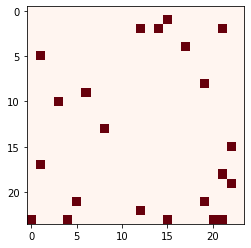

---  1  ---
input SDR:  SDR( 21 ) 0, 1, 2
Active SDR:  SDR( 576 ) 62, 113, 121, 222, 243, 320, 409, 453, 478, 567, 572

SDR( 576, 8 ) 496, 904, 968, 1776, 1944, 2560, 3272, 3624, 3824, 4536, 4576
SDR( 576, 8 ) 312, 480, 496, 552, 904, 968, 1688, 1776, 1944, 2560, 3056, 3272, 3624, 3824, 4072, 4184, 4320, 4416, 4448, 4536, 4576, 4584
----------------------------------------------------------------------
Active sdr:  SDR( 576 ) 62, 113, 121, 222, 243, 320, 409, 453, 478, 567, 572
----------------------------------------------------------------------
Predicted sdr:  SDR( 576 ) 39, 60, 62, 69, 113, 121, 211, 222, 243, 320, 382, 409, 453, 478, 509, 523, 540, 552, 556, 567, 572, 573
----------------------------------------------------------------------
PDF:  [0.14245725433800124, 0.14259952626239747, 0.14267069163622728, 0.142575772751671, 0.14386474045032369, 0.14297555743420357, 0.14285646075682604]
----------------------------------------------------------------------
predict index:  4
--

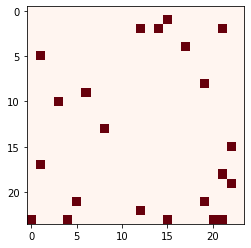

---  2  ---
input SDR:  SDR( 21 ) 12, 13, 14
Active SDR:  SDR( 576 ) 39, 60, 69, 211, 382, 509, 523, 540, 552, 556, 573

SDR( 576, 8 ) 312, 480, 552, 1688, 3056, 4072, 4184, 4320, 4416, 4448, 4584
SDR( 576, 8 ) 313, 481, 553, 1689, 3057, 4073, 4185, 4321, 4417, 4449, 4585
----------------------------------------------------------------------
Active sdr:  SDR( 576 ) 39, 60, 69, 211, 382, 509, 523, 540, 552, 556, 573
----------------------------------------------------------------------
Predicted sdr:  SDR( 576 ) 39, 60, 69, 211, 382, 509, 523, 540, 552, 556, 573
----------------------------------------------------------------------
PDF:  [0.14245725433800124, 0.14259952626239747, 0.14267069163622728, 0.142575772751671, 0.14386474045032369, 0.14297555743420357, 0.14285646075682604]
----------------------------------------------------------------------
predict index:  4
----------------------------------------------------------------------
predict label:  G



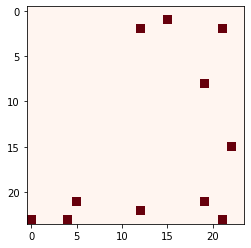

---  3  ---
input SDR:  SDR( 21 ) 12, 13, 14
Active SDR:  SDR( 576 ) 39, 60, 69, 211, 382, 509, 523, 540, 552, 556, 573

SDR( 576, 8 ) 313, 481, 553, 1689, 3057, 4073, 4185, 4321, 4417, 4449, 4585
SDR( 576, 8 ) 568, 960, 1352, 1648, 1744, 2168, 2496, 2504, 2688, 3368, 4585
----------------------------------------------------------------------
Active sdr:  SDR( 576 ) 39, 60, 69, 211, 382, 509, 523, 540, 552, 556, 573
----------------------------------------------------------------------
Predicted sdr:  SDR( 576 ) 71, 120, 169, 206, 218, 271, 312, 313, 336, 421, 573
----------------------------------------------------------------------
PDF:  [0.14253081689668565, 0.1425307884427364, 0.1426731267052533, 0.14272066372210662, 0.14275629477805785, 0.1439318818474216, 0.14285643062630607]
----------------------------------------------------------------------
predict index:  5
----------------------------------------------------------------------
predict label:  A



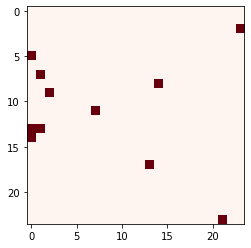

---  4  ---
input SDR:  SDR( 21 ) 15, 16, 17
Active SDR:  SDR( 576 ) 71, 120, 169, 206, 218, 271, 312, 313, 336, 421, 573

SDR( 576, 8 ) 568, 960, 1352, 1648, 1744, 2168, 2496, 2504, 2688, 3368, 4585
SDR( 576, 8 ) 569, 961, 1353, 1649, 1745, 2169, 2497, 2505, 2689, 3369, 4586
----------------------------------------------------------------------
Active sdr:  SDR( 576 ) 71, 120, 169, 206, 218, 271, 312, 313, 336, 421, 573
----------------------------------------------------------------------
Predicted sdr:  SDR( 576 ) 71, 120, 169, 206, 218, 271, 312, 313, 336, 421, 573
----------------------------------------------------------------------
PDF:  [0.14253081689668565, 0.1425307884427364, 0.1426731267052533, 0.14272066372210662, 0.14275629477805785, 0.1439318818474216, 0.14285643062630607]
----------------------------------------------------------------------
predict index:  5
----------------------------------------------------------------------
predict label:  A



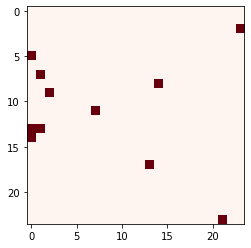

---  5  ---
input SDR:  SDR( 21 ) 15, 16, 17
Active SDR:  SDR( 576 ) 71, 120, 169, 206, 218, 271, 312, 313, 336, 421, 573

SDR( 576, 8 ) 569, 961, 1353, 1649, 1745, 2169, 2497, 2505, 2689, 3369, 4586
SDR( 576, 8 ) 314, 482, 554, 1690, 3058, 4074, 4186, 4322, 4418, 4450, 4586
----------------------------------------------------------------------
Active sdr:  SDR( 576 ) 71, 120, 169, 206, 218, 271, 312, 313, 336, 421, 573
----------------------------------------------------------------------
Predicted sdr:  SDR( 576 ) 39, 60, 69, 211, 382, 509, 523, 540, 552, 556, 573
----------------------------------------------------------------------
PDF:  [0.14245725433800124, 0.14259952626239747, 0.14267069163622728, 0.142575772751671, 0.14386474045032369, 0.14297555743420357, 0.14285646075682604]
----------------------------------------------------------------------
predict index:  4
----------------------------------------------------------------------
predict label:  G



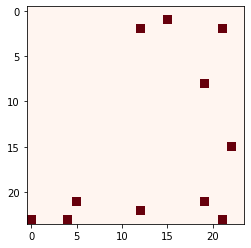

---  6  ---
input SDR:  SDR( 21 ) 12, 13, 14
Active SDR:  SDR( 576 ) 39, 60, 69, 211, 382, 509, 523, 540, 552, 556, 573

SDR( 576, 8 ) 314, 482, 554, 1690, 3058, 4074, 4186, 4322, 4418, 4450, 4586
SDR( 576, 8 ) 440, 1392, 2032, 2288, 2720, 2960, 3312, 4104, 4208, 4352, 4520
----------------------------------------------------------------------
Active sdr:  SDR( 576 ) 39, 60, 69, 211, 382, 509, 523, 540, 552, 556, 573
----------------------------------------------------------------------
Predicted sdr:  SDR( 576 ) 55, 174, 254, 286, 340, 370, 414, 513, 526, 544, 565
----------------------------------------------------------------------
PDF:  [0.14245254429847104, 0.1425950680995626, 0.14266609808429365, 0.14371635339983097, 0.1428566369485754, 0.1428566369485754, 0.1428566369485754]
----------------------------------------------------------------------
predict index:  3
----------------------------------------------------------------------
predict label:  F



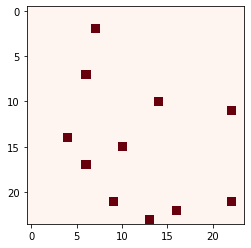

---  7  ---
input SDR:  SDR( 21 ) 9, 10, 11
Active SDR:  SDR( 576 ) 55, 174, 254, 286, 340, 370, 414, 513, 526, 544, 565

SDR( 576, 8 ) 440, 1392, 2032, 2288, 2720, 2960, 3312, 4104, 4208, 4352, 4520
SDR( 576, 8 ) 441, 1393, 2033, 2289, 2721, 2961, 3313, 4105, 4209, 4353, 4521
----------------------------------------------------------------------
Active sdr:  SDR( 576 ) 55, 174, 254, 286, 340, 370, 414, 513, 526, 544, 565
----------------------------------------------------------------------
Predicted sdr:  SDR( 576 ) 55, 174, 254, 286, 340, 370, 414, 513, 526, 544, 565
----------------------------------------------------------------------
PDF:  [0.14245254429847104, 0.1425950680995626, 0.14266609808429365, 0.14371635339983097, 0.1428566369485754, 0.1428566369485754, 0.1428566369485754]
----------------------------------------------------------------------
predict index:  3
----------------------------------------------------------------------
predict label:  F



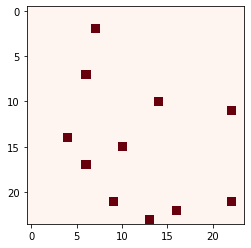

---  8  ---
input SDR:  SDR( 21 ) 9, 10, 11
Active SDR:  SDR( 576 ) 55, 174, 254, 286, 340, 370, 414, 513, 526, 544, 565

SDR( 576, 8 ) 441, 1393, 2033, 2289, 2721, 2961, 3313, 4105, 4209, 4353, 4521
SDR( 576, 8 ) 536, 824, 1464, 3520, 4336, 4360, 4368, 4376, 4464, 4568, 4587
----------------------------------------------------------------------
Active sdr:  SDR( 576 ) 55, 174, 254, 286, 340, 370, 414, 513, 526, 544, 565
----------------------------------------------------------------------
Predicted sdr:  SDR( 576 ) 67, 103, 183, 440, 542, 545, 546, 547, 558, 571, 573
----------------------------------------------------------------------
PDF:  [0.1423764783858811, 0.14237644992481838, 0.1436635833183937, 0.1428041936613007, 0.14294706332750648, 0.14297567466849753, 0.14285657789346543]
----------------------------------------------------------------------
predict index:  2
----------------------------------------------------------------------
predict label:  E



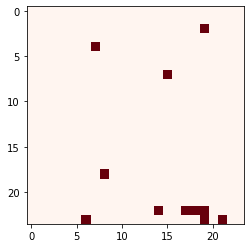

---  9  ---
input SDR:  SDR( 21 ) 6, 7, 8
Active SDR:  SDR( 576 ) 67, 103, 183, 440, 535, 542, 545, 546, 547, 558, 571

SDR( 576, 8 ) 536, 824, 1464, 3520, 4280, 4281, 4282, 4283, 4284, 4285, 4286, 4287, 4336, 4360, 4368, 4376, 4464, 4568
SDR( 576, 8 ) 537, 825, 1465, 3521, 4337, 4361, 4369, 4377, 4465, 4569, 4588
----------------------------------------------------------------------
Active sdr:  SDR( 576 ) 67, 103, 183, 440, 535, 542, 545, 546, 547, 558, 571
----------------------------------------------------------------------
Predicted sdr:  SDR( 576 ) 67, 103, 183, 440, 542, 545, 546, 547, 558, 571, 573
----------------------------------------------------------------------
PDF:  [0.1423764783858811, 0.14237644992481838, 0.1436635833183937, 0.1428041936613007, 0.14294706332750648, 0.14297567466849753, 0.14285657789346543]
----------------------------------------------------------------------
predict index:  2
----------------------------------------------------------------------
pre

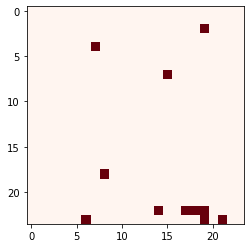

---  10  ---
input SDR:  SDR( 21 ) 6, 7, 8
Active SDR:  SDR( 576 ) 67, 103, 183, 440, 535, 542, 545, 546, 547, 558, 571

SDR( 576, 8 ) 537, 825, 1465, 3521, 4280, 4281, 4282, 4283, 4284, 4285, 4286, 4287, 4337, 4361, 4369, 4377, 4465, 4569
SDR( 576, 8 ) 792, 1216, 2376, 2976, 3880, 4210, 4296, 4419, 4440, 4512, 4600
----------------------------------------------------------------------
Active sdr:  SDR( 576 ) 67, 103, 183, 440, 535, 542, 545, 546, 547, 558, 571
----------------------------------------------------------------------
Predicted sdr:  SDR( 576 ) 99, 152, 297, 372, 485, 526, 537, 552, 555, 564, 575
----------------------------------------------------------------------
PDF:  [0.14216658534527118, 0.14345181055965478, 0.14280772357134836, 0.14280774261872753, 0.1429506217958146, 0.14283630702174374, 0.14297921477752212]
----------------------------------------------------------------------
predict index:  1
----------------------------------------------------------------------

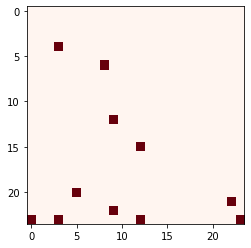

---  11  ---
input SDR:  SDR( 21 ) 3, 4, 5
Active SDR:  SDR( 576 ) 99, 152, 297, 372, 485, 526, 537, 552, 555, 564, 575

SDR( 576, 8 ) 792, 1216, 2376, 2976, 3880, 4210, 4296, 4419, 4440, 4512, 4600
SDR( 576, 8 ) 793, 1217, 2377, 2977, 3881, 4211, 4297, 4420, 4441, 4513, 4601
----------------------------------------------------------------------
Active sdr:  SDR( 576 ) 99, 152, 297, 372, 485, 526, 537, 552, 555, 564, 575
----------------------------------------------------------------------
Predicted sdr:  SDR( 576 ) 99, 152, 297, 372, 485, 526, 537, 552, 555, 564, 575
----------------------------------------------------------------------
PDF:  [0.14216658534527118, 0.14345181055965478, 0.14280772357134836, 0.14280774261872753, 0.1429506217958146, 0.14283630702174374, 0.14297921477752212]
----------------------------------------------------------------------
predict index:  1
----------------------------------------------------------------------
predict label:  D



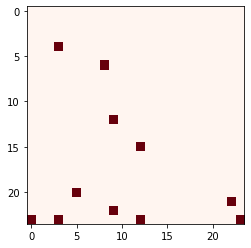

---  12  ---
input SDR:  SDR( 21 ) 3, 4, 5
Active SDR:  SDR( 576 ) 99, 152, 297, 372, 485, 526, 537, 552, 555, 564, 575

SDR( 576, 8 ) 793, 1217, 2377, 2977, 3881, 4211, 4297, 4420, 4441, 4513, 4601
SDR( 576, 8 ) 497, 905, 969, 1777, 1945, 2561, 3273, 3625, 3825, 4537, 4577
----------------------------------------------------------------------
Active sdr:  SDR( 576 ) 99, 152, 297, 372, 485, 526, 537, 552, 555, 564, 575
----------------------------------------------------------------------
Predicted sdr:  SDR( 576 ) 62, 113, 121, 222, 243, 320, 409, 453, 478, 567, 572
----------------------------------------------------------------------
PDF:  [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285]
----------------------------------------------------------------------
predict index:  0
----------------------------------------------------------------------
predict label:  C



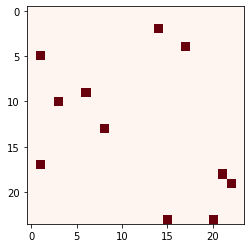

---  13  ---
input SDR:  SDR( 21 ) 0, 1, 2
Active SDR:  SDR( 576 ) 62, 113, 121, 222, 243, 320, 409, 453, 478, 567, 572

SDR( 576, 8 ) 497, 905, 969, 1777, 1945, 2561, 3273, 3625, 3825, 4537, 4577
SDR( 576, 8 ) 496, 904, 968, 1776, 1944, 2560, 3272, 3624, 3824, 4536, 4576
----------------------------------------------------------------------
Active sdr:  SDR( 576 ) 62, 113, 121, 222, 243, 320, 409, 453, 478, 567, 572
----------------------------------------------------------------------
Predicted sdr:  SDR( 576 ) 62, 113, 121, 222, 243, 320, 409, 453, 478, 567, 572
----------------------------------------------------------------------
PDF:  [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285]
----------------------------------------------------------------------
predict index:  0
----------------------------------------------------------------------
predict label:  C



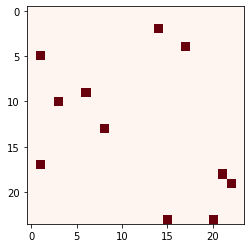

In [10]:
for i in range(len(seq)):
    print("--- ", i ," ---")
    inputSDR = enc.encode(seq[i])
    print("input SDR: ",inputSDR)
    sp.compute(inputSDR, True, activeSDR)
    print("Active SDR: ",activeSDR)
    print("")

    #sampleSDR=activeSDR.dense.reshape(24,24)
    #plt.imshow(sampleSDR, cmap = "Blues")
    #plt.pause(0.01)

    tm.compute( activeSDR, learn=False)
    tm.activateDendrites(True)
    activeColumnsIndices   = [tm.columnForCell(i) for i in tm.getActiveCells().sparse]
    predictedColumnIndices = [tm.columnForCell(i) for i in tm.getPredictiveCells().sparse]

    print(tm.getActiveCells())
    print(tm.getPredictiveCells())

    active_sdr = SDR( tm.numberOfColumns() )
    active_sdr.sparse  = np.array(sorted(set(activeColumnsIndices)))
    print("-"*70 )
    print("Active sdr: ", active_sdr)

    predict_sdr = SDR( tm.numberOfColumns() )
    predict_sdr.sparse  = np.array(sorted(set(predictedColumnIndices)))
    print("-"*70 )
    print("Predicted sdr: ",predict_sdr)

    if  len(predict_sdr.sparse) == 0:
        tm_predict = "nan"
        tm_pitchNames = "nan"      
    else:
        tm_predict = np.argmax( clsr.infer( predict_sdr) ) 
        tm_pitchNames = pitchNames[tm_predict]

    print("-"*70 )
    print("PDF: ",clsr.infer( predict_sdr) )
    print("-"*70 )

    print("predict index: ",tm_predict)
    print("-"*70 )
    print("predict label: ",tm_pitchNames)

    print("")

    sampleSDR=predict_sdr.dense.reshape(24,24)
    plt.imshow(sampleSDR, cmap = "Reds")
    plt.pause(0.01)

In [ ]:
["C","C","G","G","A","A","G","F","F","E","E","D","D","C"]

In [ ]:
["C","G","G","G","A","A","G","F","F","E","E","D","D","C"]